# Interpretability 8: Adding auxiliary variables

When we do a regression task, it might be good to include auxiliary input variables, even though they might be dependent on other variables. For example, to regress $m(m_0, v, c)=m_0/\sqrt{1-(v/c)^2}$, it is desirable to include the dimensionaless varabile $\beta = v/c$ as a separate input variable. If we also know this is a task in relativity, we may also include $\gamma=1/\sqrt{1-(v/c)^2}$ because $\gamma$ appears frequently in relativity.

In [1]:
from kan.MultKAN import MultKAN
from sympy import *
from kan.utils import create_dataset, augment_input
import torch

seed = 1
torch.manual_seed(seed)
torch.set_default_dtype(torch.float64)

input_variables = m0, v, c = symbols('m0 v c')

# define auxillary variables
beta = v/c
gamma = 1/sqrt(1-beta**2)

aux_vars = (beta, gamma)

f = lambda x: x[:,[0]]/torch.sqrt(1-x[:,[1]]**2/x[:,[2]]**2)
dataset = create_dataset(f, n_var=3, ranges=[[0,1],[0,0.9],[1.1,2]])

# add auxillary variables
dataset = augment_input(input_variables, aux_vars, dataset)
input_variables = aux_vars + input_variables

In [2]:
model = MultKAN(width=[5,[0,1]], mult_arity=2, grid=3, k=3, seed=seed)

checkpoint directory created: ./model
saving model version 0.0


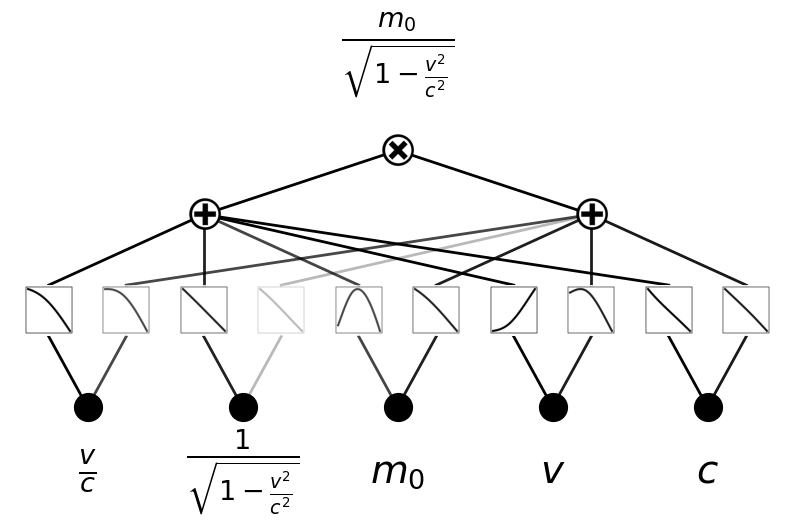

In [3]:
model(dataset['train_input'])
model.plot(in_vars=input_variables, out_vars=[m0/sqrt(1-v**2/c**2)], scale=1.0, varscale=0.7)

In [4]:
model.fit(dataset, steps=50, lamb=1e-5, lamb_coef=1.0);

| train_loss: 5.13e-04 | test_loss: 6.64e-04 | reg: 3.18e+00 | : 100%|█| 50/50 [00:07<00:00,  7.10it

saving model version 0.1


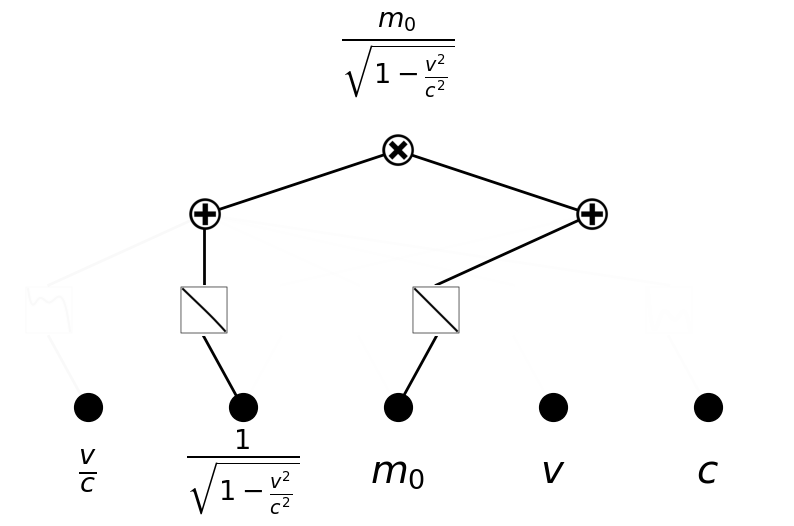

In [5]:
model.plot(in_vars=input_variables, out_vars=[m0/sqrt(1-v**2/c**2)], scale=1.0, varscale=0.7)

In [6]:
model = model.prune(edge_th=5e-2)

saving model version 0.2


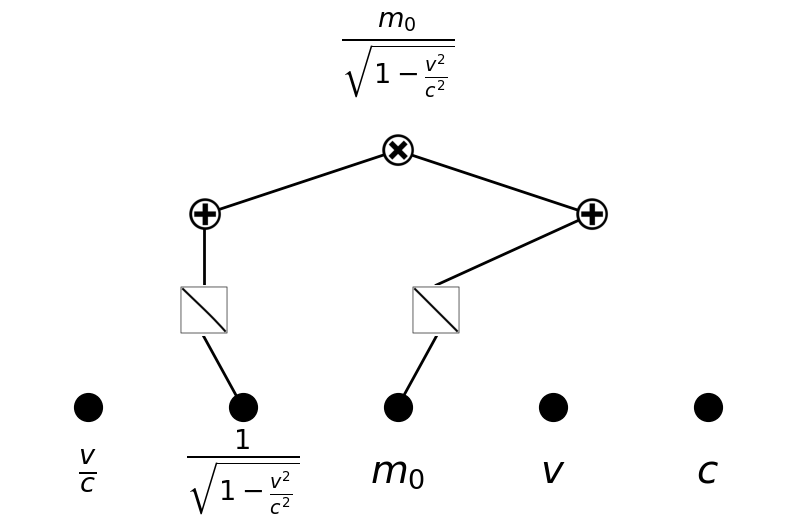

In [7]:
model.plot(in_vars=input_variables, out_vars=[m0/sqrt(1-v**2/c**2)], scale=1.0, varscale=0.7)

In [8]:
model.fit(dataset, steps=100, lamb=0e-3);

| train_loss: 3.15e-06 | test_loss: 1.99e-05 | reg: 2.74e+00 | : 100%|█| 100/100 [00:10<00:00,  9.48

saving model version 0.3


In [9]:
model.auto_symbolic()

fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,1,0) with x, r2=0.999998976626967, c=1
fixing (0,1,1) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with x, r2=0.9999999998075859, c=1
fixing (0,3,0) with 0
fixing (0,3,1) with 0
fixing (0,4,0) with 0
fixing (0,4,1) with 0
saving model version 0.4


In [10]:
sf = model.symbolic_formula(var=input_variables)[0][0]
sf

1.0*(0.000189505852432992 - 0.817980335069318/sqrt(1 - v**2/c**2))*(-1.22278885546569*m0 - 2.33019836537451e-7)

In [11]:
from kan.utils import ex_round

nsimplify(ex_round(ex_round(ex_round(sf,6),3),3))

m0/sqrt(1 - v**2/c**2)